In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

$\textbf{1-D Advection equation } $
\begin{equation}
       \partial_t u + \partial_x u = 0, 
\end{equation}

$\textbf{Algorithm 4.1 Reconstruct-evolve-average } $(Leveuqe FVM red book pg 76)
1. Reconstruct a piecewise polynomial function $\tilde{q}^n(x, t_n)$ defined for all x, from the cell
averages $Q_n$
In the simplest case this is a piecewise constant function that takes the
value $Q_n$ in the ith grid cell, i.e.,
$$\tilde{q}^n(x, t_n) = Q_i^n \text{ for all x} \in C_i$$

2. Evolve the hyperbolic equation exactly (or approximately) with this initial data to obtain
$\tilde{q}^n(x, t_{n+1})$ a time $\Delta t$ later.

3. Average this function over each grid cell to obtain new cell averages
$$Q_i^{n+1} = \frac{1}{\Delta x} \int_{C_i} \tilde{q}^n(x, t_{n+1}) dx


In [ ]:
def rea(x, k, dt, a, u0):
    n = len(x) - 1
    h = x[1] - x[0]
    cell_avg = np.where(x[:-1] < 0, u0[:-1], u0[1:]) / h

    for _ in range(k):
        discont = (_ * dt * a) % (x[-1] - x[0])
        mask = (x[:-1] < discont) & (x[1:] > discont)
        cell_avg[mask] = (u0[:-1][mask] * (discont - x[:-1][mask]) + u0[1:][mask] * (x[1:][mask] - discont)) / h

    return cell_avg


In [18]:
def rea(x, Q, dt, a):
    n = len(x)
    dx = x[1] - x[0]
    Q_new = np.zeros_like(Q)  # Initialize the new cell averages

    # Step 1: Reconstruct
    Q_tilde = np.zeros(n)  # Initialize the piecewise polynomial function

    # Simplest case: piecewise constant function
    for i in range(n - 1):
        Q_tilde[i] = Q[i]  # Assign cell average to each grid cell

    # Step 2: Evolve
    # In this simplified example, we won't evolve the hyperbolic equation, just copy Q_tilde
    Q_tilde_next = np.copy(Q_tilde)

    # Step 3: Average
    for i in range(n - 1):
        Q_new[i] = np.mean(Q_tilde_next[i:i+2])  # Average over each grid cell

    return Q_new





# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define the initial condition function g(x)
def g(x):
    return np.where(x <= 0, 2, 1)

# Initialize lists to store h values and errors
h_values = []
errors = []

# Time interval
T = 0.25


# Run the function for each k value
for k in range(5, 11):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h

    # Initial cell averages
    Q = g(x)  # Use the entire spatial grid

    # Advection speed
    c = 1.0

    # Number of time steps
    num_steps = k  # Use k as the number of time steps

    # Apply the REA algorithm
    for _ in range(num_steps):
        Q = rea(x,Q,dt,c)  # Adjust the length of Q to match x

    # Compute the exact solution at final time
    u_exact = g(x - c*T)

    # Compute the error at final time
    error = np.linalg.norm(np.abs(Q - u_exact), ord=1)

    # Store h and error
    h_values.append(h)
    errors.append(error)


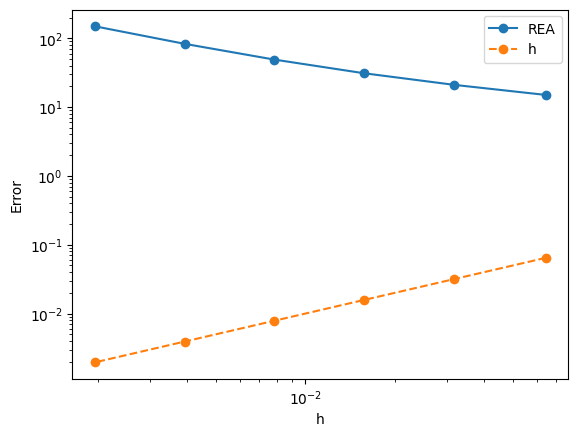

In [24]:
# Plot the convergence
plt.loglog(h_values, errors, 'o-', label='REA')
plt.loglog(h_values, h_values, '--o', label='h')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

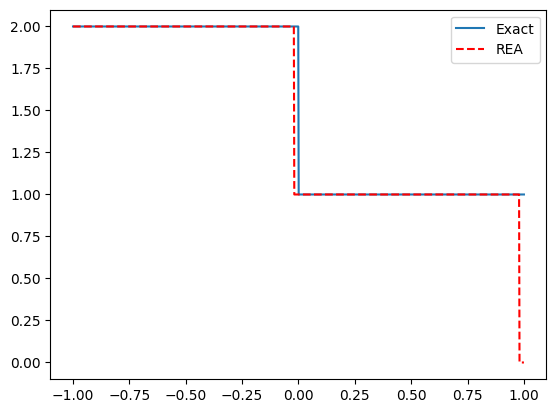

In [29]:
plt.plot(x,g(x),label = 'Exact')
plt.plot(x,Q,'--r', label = 'REA')
plt.legend()

In [ ]:
def rea(x,k,dt,a,u0):
  n = len(x)-1 #number of cells
  cell_avg = np.empty(n)
  for i in range(n): #first reconstruction: piecewise constant average
    if x[i] < 0 and x[i+1] > 0: #contains initial discontinuity at x=0
      cell_avg[i] = (u0[i]*(-x[i])+u0[i+1](x[i+1]))/h
    elif x[i] < 0 and x[i+1] <0: #cell fully to the left of initial discontinuity at x=0
      cell_avg[i] = (u0[i])/h
    else: #cell fully to the right of initial discontinuity at x=0
      cell_avg[i] = (u0[i])/h

    print(cell_avg)
  for j in range(k): #evolution
    discont = j*dt*a #location of discontinuity advected from 0
    if discont > x[n+1]: #if discontinuity passes by periodic boundary, adjust location by domain size
      discont -=(x[n+1]-x[0])
    discont_per = discont + x[0]#location of discontinuity advected from left boundary
    for i in range(n): #averaging and reconstruction per time step
      if x[i]<discont and x[i+1]>discont: #cell containing discontinuity initially advected from 0
        (u0[0](discont - x[i]) + u0[n+1](x[i+1]-discont))/h
      elif x[i]<discont_per and x[i+1]>discont_per: #cell containing discontinuity initially advected from u_L
        (u0[0](discont_per - x[i]) + u0[n+1](x[i+1]-discont_per))/h
      elif discont<=0 and x[i+1]<discont: #cell fully contained in u_L area, discont to left (or equal) of 0
        cell_avg[i] = u0[0]
      elif discont>0 and x[i+1]<discont and x[i]>discont_per: #cell fully contained in u_L area, discont to right of 0
        cell_avg[i] = u0[0]
      elif discont<=0 and x[i]>discont and x[i+1]<discont_per: #cell fully contained in u_R area, discont to left (or equal) of 0
        cell_avg[i] = u0[n+1]
      elif discont>0 and x[i]>discont: #cell fully contained in u_R area, discont to right of 0
        cell_avg[i] = u0[n+1]
  return cell_avgthe 

In [ ]:
def rea(h, n_nodes, x, k, dt, a, u0):
    h = h * (n_nodes - 1)
    n = len(x) - 1  # number of cells
    cell_avg = np.empty(n)
    
    for i in range(n):  # first reconstruction: piecewise constant average
        if x[i] < 0 and x[i+1] > 0:  # contains initial discontinuity at x=0
            cell_avg[i] = (u0[i]*(-x[i]) + u0[i+1]*x[i+1]) / h
        elif x[i] < 0 and x[i+1] < 0:  # cell fully to the left of initial discontinuity at x=0
            cell_avg[i] = u0[i]
        else:  # cell fully to the right of initial discontinuity at x=0
            cell_avg[i] = u0[i+1]

    for j in range(k):  # evolution
        discont = j * dt * a  # location of discontinuity advected from 0
        if discont > x[n]:  # if discontinuity passes by periodic boundary, adjust location by domain size
            discont -= (x[n] - x[0])
        discont_per = discont + x[0]  # location of discontinuity advected from left boundary
        
        for i in range(n):  # averaging and reconstruction per time step
            if x[i] < discont and x[i+1] > discont:  # cell containing discontinuity initially advected from 0
                cell_avg[i] = (u0[0]*(discont - x[i]) + u0[n]*(x[i+1] - discont)) / h
            elif x[i] < discont_per and x[i+1] > discont_per:  # cell containing discontinuity initially advected from u_L
                cell_avg[i] = (u0[0]*(discont_per - x[i]) + u0[n]*(x[i+1] - discont_per)) / h
            elif discont <= 0 and x[i+1] < discont:  # cell fully contained in u_L area, discont to left (or equal) of 0
                cell_avg[i] = u0[0]
            elif discont > 0 and x[i+1] < discont and x[i] > discont_per:  # cell fully contained in u_L area, discont to right of 0
                cell_avg[i] = u0[0]
            elif discont <= 0 and x[i] > discont and x[i+1] < discont_per:  # cell fully contained in u_R area, discont to left (or equal) of 0
                cell_avg[i] = u0[n]
            elif discont > 0 and x[i] > discont:  # cell fully contained in u_R area, discont to right of 0
                cell_avg[i] = u0[n]
    return cell_avg


In [ ]:
h,x = mesh_generator_1d(-1,1,5)

In [ ]:
# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define the initial condition function g(x)
def g(x):
    return np.where(x<0, 2, 1)



In [ ]:

def jumpFinder(arr):
    return np.where(np.diff(arr) != 0)[0] + 1

def plotArray(arr):
    indices = np.arange(len(arr))

    plt.figure(figsize=(10, 6))
    plt.plot(indices, arr, marker='o')
    plt.title('Plot of Array')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()





In [ ]:

# Initialize lists to store h values and errors
h_values = []
errors = []
dtSum = 0
# Time interval
T = 2.0

# Run the function for each k value
for k in range(5, 11):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h
    

    # Initial cell averages
    Q = g(x)

    # Advection speed
    c = 1.0

    dtSum += c*dt

    # Number of time steps
    num_steps = int(T / dt)

    # Apply the REA algorithm
    for _ in range(num_steps):
        Q = rea(h,n_nodes,x,k,dt,c,Q)

    # Compute the exact solution at final time
    # u_exact = g(x - c*T)
    u_exact = g(x)

    # Compute the error at final time
    error = np.linalg.norm(np.abs(Q - u_exact),ord = 1)

    # Store h and error
    h_values.append(h)
    errors.append(error*h)




In [ ]:
# Plot the convergence
plt.loglog(h_values, errors, 'o-', label='REA')
plt.loglog(h_values, h_values, '--', label='h')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
#Convergence Calculation 
# Initialize lists to store h values and errors
h_values = []
errors = []

# Time interval
T = 2.0

# Run the function for each k value
for k in range(5, 13):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h

    # Initial cell averages
    Q = g(x)

    # Advection speed
    c = 0.5

    # Number of time steps
    num_steps = int(T / dt)

    # Apply the Godunov's method
    for _ in range(num_steps):
        Q = godunov_advection(Q, c, dt, dx)

    # Compute the exact solution at final time
    u_exact = g(x - c*T)

    # Compute the error at final time
    error = np.max(np.abs(Q - u_exact))

    # Store h and error
    h_values.append(h)
    errors.append(error)




In [ ]:
# Plot the convergence
plt.loglog(h_values, errors, 'o-', label='Numerical')
plt.loglog(h_values, h_values, '--', label='h')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
#animation 
# Define the initial condition function g(x)
def g(x):
    sigma = 0.01
    return np.exp(-x**2 / sigma**2)


# Time interval
T = 2.0

# Initialize the figure
fig = plt.figure(figsize=(5, 5))

# Run the function for each k value
for k in range(5, 15):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h

    # Initial cell averages
    Q = g(x)

    # Advection speed
    c = 0.5

    # Number of time steps
    num_steps = int(T / dt)

    # Apply the Godunov's method and plot each step
    for n in range(num_steps):
        Q = godunov_advection(Q, c, dt, dx)

        # Clear the figure
        fig.clear()

        # Plot the current solution
        plt.plot(x, Q, label=f'Time Step: {n}/{num_steps}')
        plt.xlim(min(x), max(x))
        plt.ylim(min(Q), max(Q))
        plt.xlabel('$x$')
        plt.ylabel('approximation of $u$')
        plt.legend()
        plt.title('Godunov\'s Method for Advection Equation')

        # Display the figure
        display(fig)
        time.sleep(0.001)
        clear_output(wait=True)


Godunov flux function for convex scalar conservation law (Leveque Red p228)

$$F_{i-\frac{1}{2}}^n = \begin{cases}
    f(Q_{i-1}) & \text{if } Q_{i-1} > q_s &\text{and} &s > 0\\
    f(Q_i) & \text{if } Q_i < q_s &\text{and} &s < 0\\
    f(q_s) & \text{if } & Q_{i-1} < q_s < Q_i\\

    \end{cases}
$$

$s$ = $\frac{[f(Q_i) - f(Q_{i-1})]}{Q_i - Q_{i-1}} $

Godunov method reduced to the first-order upwind method

$$Q^{n+1}_i = Q_i - \frac{\Delta t}{\Delta x}[f(Q_i)-f(Q_{i-1})] $$

$q_s$ is the unique value of q for which $f'(q_s) = 0$


In [ ]:
#Def for advection equation 

# mesh generator function
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# initial condition function g(x)
def g(x):
    return np.where(x <= 0, 1, 2)

# exact solution function f(x, t)
def f_exact(x, t):
    return g(x - c * t)

# flux function for advection 
def flux(q):
    return c * q

# Rieman solver based on speed 
def solve_riemann(ql, qr, c):
    # c = (flux(qr) - flux(ql)) / ((qr - ql)+1e-10)
    if c > 0:
        return ql
    else:
        return qr

# Godunov solver function
def godunov_solver(n_nodes, T):
    # x_l = -1  # Define the left boundary
    # x_r = 1   # Define the right boundary
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)  # Generate the mesh

    dx = h
    # dt = 0.005
    dt = 0.9 * dx / c  
    N = n_nodes  # Number of nodes

    # Initialize solution array
    u = g(x)  # Initialize u with the initial condition

    # Perform Godunov's method
    t = 0
    while t < T:
        u_old = u.copy()
        for i in range(1, N - 1):
            ql = u_old[i - 1]
            qr = u_old[i]
            q_left = solve_riemann(ql, qr, c)
            ql = u_old[i]
            qr = u_old[i + 1]
            q_right = solve_riemann(ql, qr, c)
            f_left = flux(q_left)
            f_right = flux(q_right)
            u[i] = u_old[i] - dt / dx * (f_right - f_left)
            #update boundary conditions
            u[0] = u[-1]
            # u[-1] = u[1]
            # u[0] = g(x[0] - c*t)  # Dirichlet boundary condition at x_l
            # u[-1] = g(x[-1] - c*t)  # Dirichlet boundary condition at x_r
        t += dt
    
    return u, x


# Perform the convergence analysis
errors = []
h_val = []

T = 0.25   #final time
c = 1   #for advection 
x_r  = 1
x_l = -1


k_values = range(2, 7)
for k in k_values:
    n_nodes = 2 ** k + 1
    u, x  = godunov_solver(n_nodes, T)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x, T), ord=1)
    h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# Display the errors
for i, error in enumerate(errors):
    print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")


In [ ]:
# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

Plot u and u_exact check initial data and boundary conditions and work in REA

Print one time step 
    1. if too fast issue with flux
    2. if it goesd down somthing is wrong with edges
    *keep track of where the bump is to keep track 

In [ ]:
plt.plot(x,g(x),label = 'Exact')
plt.plot(x,f_exact(x, T),'--r', label = 'Godunov')
plt.legend()

In [ ]:
print(f'u = {u} \n\n exact = {f_exact(x, T)}')

Here you seek a numerical solution of $\textbf{Burgers' equation}$

\begin{equation}
       \partial_t u + \frac{1}{2}\partial_x u^2 = 0, 
\end{equation}

in the domain $\Omega = [-1,1]$ and a time interval $[0,0.25]$. The boundary condition is $u(0,t) = 3$ and the initial condition is 
    
\begin{equation}
    u(x,0) = \left\{
    \begin{aligned}
        3, &\,\,\quad ~if \quad x<0 ,\\
        1 &\,\, \quad ~if \quad x>0.
    \end{aligned}
    \right.
\end{equation}

Given Piecewise constant initial data $u_l = 3 > 1 = u_r$  implies this is case 1 where there is a unique weak solution. Appying the Rankine-Hugoniot  condition 

$$\frac{f(u_r)-f(u_l)}{u_l - u_r} =\frac{ \frac{1}{2} 1^2 - \frac{1}{2} 3^2}{1-3} = 2 = s$$

Given s = speed of propogation we our exact solution is: 
$$ u(x, t) = \begin{cases}
    3 & \text{if } x < 2t \\
    1 & \text{if } x \geq 2t
\end{cases}
$$


Godunov's method (Hesthaven p124)
$$u_j^{n+1} = u_j^n - \frac{k}{h}[F_{j+\frac{1}{2}}^n - F_{j-\frac{1}{2}}^n]$$
The scheme is in conservation form by construction ensuring correct shock speeds. Unknown is the cell average rather than the point value as with the finite difference scheme.

Consider Burgers's equation 
$$ u_{j+\frac{1}{2}}^* =   \left\{
\begin{array}{ll}
      u_l, & s \geq 0\\
      u_r, & s < 0\\
\end{array} 
\right.  $$

$$ s = \frac{f(u_l)-f(u_r)}{u_l - u_r}$$

$$u_j^{n+1} = u_j^n - \frac{k}{h} [f(u_{j+\frac{1}{2}}^*) - f(u_{j-\frac{1}{2}}^*)] $$
$u^*$ is computed by solving the Riemann problem exactly and selecting the correct entropy solution.



Leveque Green pg. 144

In [ ]:
# i = 3
# Q = u0
# # Q
# s = (f(Q[i]) - f(Q[i-1])) / (Q[i]-Q[i-1])
# # for i in range(1,len(Q)-1):
# s
# # print(f'u0 = {Q}')
# # godunov_flux(3,1,0,))

In [ ]:
# k = 2
# nNodes = 2*k +1
# xL = -1
# xR = 1
# t0 = 0
# T = 0.25

# h,x = mesh_generator_1d(xL,xR,nNodes)
# u0 = u_initial(x)

In [ ]:
# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords


In [ ]:
# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

#Conditions for Burgers equation 
# Define the initial condition
def u_initial(x):
    return np.where(x <= 0, 3, 1)

# Define the exact solution
def u_exact(x, t):
    return np.where(x < 2*t, 3, 1)

# Define the flux function
def f(u):
    return np.power(u, 2) / 2




In [ ]:
#Def for burgers equation
#ToDo: change flux, u_initial, u_exact

# mesh generator function
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# initial condition function g(x)
def g(x):
    return np.where(x < 0, 1, 2)

# exact solution function f(x, t)
def f_exact(x, t):
    return g(x - c * t)

# flux function for advection 
def flux(q):
    return c * q

# Define your solve_riemann function
def solve_riemann(ql, qr, flux):
    c = (flux(qr) - flux(ql)) / ((qr - ql)+1e-10)
    if c > 0:
        return ql
    else:
        return qr

# Godunov solver function
def godunov_solver(n_nodes, T):
    # x_l = -1  # Define the left boundary
    # x_r = 1   # Define the right boundary
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)  # Generate the mesh

    dx = h
    dt = h  # CFL condition
    N = n_nodes  # Number of nodes

    # Initialize solution array
    u = g(x)  # Initialize u with the initial condition

    # Perform Godunov's method
    t = 0
    while t < T:
        u_old = u.copy()
        for i in range(1, N - 1):
            ql = u_old[i - 1]
            qr = u_old[i]
            q_left = solve_riemann(ql, qr, flux)
            ql = u_old[i]
            qr = u_old[i + 1]
            q_right = solve_riemann(ql, qr, flux)
            f_left = flux(q_left)
            f_right = flux(q_right)
            u[i] = u_old[i] - dt / dx * (f_right - f_left)
            #update boundary conditions
            # u[0] = u[-2]
            u[-1] = u[1]
        t += dt

    return u, x


# Perform the convergence analysis
errors = []
h_val = []

T = 1     #final time
c = 1 #for advection 
x_r  = 1
x_l = -1


k_values = range(2, 7)
for k in k_values:
    n_nodes = 2 ** k + 1
    u, x_coords = godunov_solver(n_nodes, T)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x_coords, T), ord=1)
    h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# Display the errors
for i, error in enumerate(errors):
    print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")


In [ ]:
import numpy as np

# Define your mesh generator function
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define your initial condition function g(x)
def g(x):
    return np.where(x < 0, 2, 1)

# Define your exact solution function f(x, t)
def f_exact(x, t):
    return g(x - c * t)

# Define your flux function
def flux(q):
    return c * q

# Define your solve_riemann function
def solve_riemann(ql, qr, flux):
    c = (flux(qr) - flux(ql)) / (qr - ql)
    if c > 0:
        return ql
    else:
        return qr

# Godunov solver function
def godunov_solver(n_nodes, T):
    x_l = -1  # Define the left boundary
    x_r = 1   # Define the right boundary
    h, x_coords = mesh_generator_1d(x_l, x_r, n_nodes)  # Generate the mesh

    dx = h
    dt = 0.9 * dx / np.abs(c)  # CFL condition
    N = n_nodes  # Number of nodes

    # Initialize solution array
    q = g(x_coords)  # Initialize q with the initial condition

    # Perform Godunov's method
    t = 0
    while t < T:
        q_old = q.copy()
        for i in range(1, N - 1):
            ql = q_old[i - 1]
            qr = q_old[i]
            q_left = solve_riemann(ql, qr, flux)
            ql = q_old[i]
            qr = q_old[i + 1]
            q_right = solve_riemann(ql, qr, flux)
            f_left = flux(q_left)
            f_right = flux(q_right)
            q[i] = q_old[i] - dt / dx * (f_right - f_left)
        t += dt

    # Calculate the error
    error = np.linalg.norm(q - f_exact(x_coords, T), ord=1) * h
    return error

# Perform the convergence analysis
errors = []
h_val = []
h2_val = []
error2 = []

T = 1     # Define the final time
# c = 1     
x_r = 1
x_l = -1

k_values = range(2, 7)
for k in k_values:
    n_nodes = 2 ** k + 1
    error = godunov_solver(n_nodes, T)
    h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)
    h2_val.append(h ** 2)
    error2.append(error * h ** 2)

# Display the errors
for i, error in enumerate(errors):
    print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")


In [ ]:


# Define your mesh generator function
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define your initial condition function g(x)
def g(x):
    return np.where(x < 0, 1, 2)

# Define your exact solution function f(x, t)
def f_exact(x, t):
    return g(x - c * t)

# Define your flux function
def flux(q):
    return c * q

# Define your solve_riemann function
def solve_riemann(ql, qr, flux):
    c = (flux(qr) - flux(ql)) / ((qr - ql)+1e-10)
    if c > 0:
        return ql
    else:
        return qr

# Godunov solver function
def godunov_solver(n_nodes, T):
    x_l = -1  # Define the left boundary
    x_r = 1   # Define the right boundary
    h, x_coords = mesh_generator_1d(x_l, x_r, n_nodes)  # Generate the mesh

    dx = h
    dt = h  # CFL condition
    N = n_nodes  # Number of nodes

    # Initialize solution array
    u = g(x_coords)  # Initialize u with the initial condition

    # Perform Godunov's method
    t = 0
    while t < T:
        u_old = u.copy()
        for i in range(1, N - 1):
            ql = u_old[i - 1]
            qr = u_old[i]
            q_left = solve_riemann(ql, qr, flux)
            ql = u_old[i]
            qr = u_old[i + 1]
            q_right = solve_riemann(ql, qr, flux)
            f_left = flux(q_left)
            f_right = flux(q_right)
            u[i] = u_old[i] - dt / dx * (f_right - f_left)
            #update boundary conditions
            # u[0] = u[-2]
            u[-1] = u[1]
        t += dt

    return u, x_coords

# Perform the convergence analysis
errors = []
h_val = []

T = 1     # final time


k_values = range(2, 7)
for k in k_values:
    n_nodes = 2 ** k + 1
    u, x_coords = godunov_solver(n_nodes, T)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x_coords, T), ord=1)
    h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# Display the errors
for i, error in enumerate(errors):
    print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")


In [ ]:
# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f'f_exact = {f_exact(x_coords,T)}  \n\n u = {u}')


In [ ]:
import numpy as np

# Define the domain and grid size
x_l = -1.0
x_r = 1.0
T = 0.25
t0 = 0

# Define the flux function for the Burgers' equation
def f(Q):
    return 0.5 * Q**2

def godunov_flux(u_left, u_right, q_s, s, f):
    """ Compute the Godunov flux """
    if s >= 0:
        return f(u_left)
    elif u_left <= q_s <= u_right:
        return f(q_s)
    else:
        return f(u_right)

# Perform the convergence analysis
errors = []
h_val = []
h2_val = []
error2 = []

k_values = range(2, 5)
for k in k_values:
    n_nodes = 2**k + 1
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)
    dt = h/3
    u = np.zeros((int(np.ceil(T/dt))+1, len(x)))
    u0 = u_initial(x)
    
    # Find the index where the initial condition changes
    change_index = np.where(np.diff(u0) != 0)[0][0] + 1
for n in range(1, int(np.ceil(T/dt))):
    u0_old = u0.copy()
    for i in range(len(u0)):  # include all elements
        if i == 0 or u0_old[i] != u0_old[i-1]:
            try:
                u0[i] = u0_old[i] - dt / dx * (gudonov(u0_old[i], u0_old[(i+1)%len(u0)]) 
                                                - gudonov(u0_old[(i-1)%len(u0)], u0_old[i]))
            except ValueError:
                print(f"Q_i: {u0_old[i]}, Q_i_minus_1: {u0_old[i-1]}, q_s: {q_s}")
                continue  # skip to the next iteration
        else:
            u0[i] = u0_old[i]
    u0[-1] = 1  # Manually set the last element to 1
    u[n] = u0

    error = np.linalg.norm(u[-1] - u_exact(x, T), ord = 1)
    errors.append(error*h)
    error2.append(error*h**2)

    h_val.append(h)
    h2_val.append(h**2)


In [ ]:
import numpy as np

# Define the initial condition, domain, and time interval
u0 = np.array([3, 3, 3, 1, 1])
domain = [-1, 1]
time_interval = [0, 0.25]

# Define the discretization parameters
dx = (domain[1] - domain[0]) / (len(u0) - 1)
dt = (time_interval[1] - time_interval[0]) / 100  # for example

# Initialize the solution with the initial condition
Q = np.copy(u0)

# Define the flux function for the Burgers' equation
def f(Q):
    return 0.5 * Q**2

# Time-stepping loop
for n in range(100):  # for example
    Q = godunov_method(Q, dt, dx, f, godunov_flux)


In [ ]:
# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o-', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate the convergence plot
plt.figure()
plt.loglog(h2_val, error2, 'o-', label = 'Godunov')
plt.loglog(h2_val, h2_val, 'o-', label = 'h**2')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

def godunov_burgers_eq_animation(f, godunov_flux, t0, T, x, h, u0):
    dt = h / 3
    Nt = int((T - t0) / dt)
    u = np.zeros((Nt + 1, len(x)))
    u[0] = u0

    fig = plt.figure(figsize=(5, 5))
    for n in range(Nt):
        u[n + 1] = godunov_method(u[n], dt, h, f, godunov_flux)
        
        fig.clear()
        plt.plot(x, u[n], label=f'Time Step: {n}/{Nt}')
        plt.xlim(min(x), max(x))
        plt.xlabel('$x$')
        plt.ylabel('approximation of $u$')
        plt.legend()
        plt.title(f'Godunov Method for Burgers Equation')

        display(fig)
        time.sleep(0.001)
        clear_output(wait=True)


In [ ]:
godunov_burgers_eq_animation(f,godunov_flux,t0,T,x,h,u0)

In [ ]:
# def Godunov(f, f_prime, f_type, f_extrema):
#     def flux(j, u, dx, dt):
#         if f_type == 'convex':
#             flux = max(f(max(u[j], f_extrema)), f(min(u[j+1], f_extrema)))
#         elif f_type == 'concave':
#             flux = min(f(min(u[j], f_extrema)), f(max(u[j+1], f_extrema)))
#         else:
#             flux = 0
#         return flux
#     return flux
